In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dataset_path = "/content/gdrive/MyDrive/Credit_Card_Fraud_Detection/creditcard.csv"

### IMPORTING LIBRARIES:



In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import pickle

import warnings
warnings.filterwarnings('ignore')

### Data Understanding

- The datasets contains transactions made by credit cards in September 2013 by european cardholders.
-This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
-The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
- The Data has 32 features from V1-V28 which are unknown for confidentiality, -TIme, Amount and Class
-The input features are V1-V28, Time and Amount
-The target variable is Class
-The Data does not have any missing values as evident from the below mentioned code, thus need not be handled
-The Data consists of all numerical features, and only the Target Variable -Class is a categorical feature.
-Class 0: Legitimate Transaction
-Class 1: Fraud Transaction

### READING DATASET :

In [ ]:
# Read Data into a Dataframe
df=pd.read_csv(dataset_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

## Data Pre-processing

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,0.000017,0.000008,0.014970,0.000023,0.000022,-0.000016,0.000029,0.000003,0.004311,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958679,1.651295,8.073856,1.415859,1.380234,1.332244,1.237076,1.194354,2.538010,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-0.920327,-0.598532,-0.890365,-0.848611,-0.691568,-0.768290,-0.554011,-0.208630,-0.643068,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,0.018027,0.065467,0.179832,-0.019816,-0.054314,-0.274159,0.040104,0.022358,-0.051331,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315632,0.803724,1.027212,0.743355,0.611926,0.398487,0.570450,0.327349,0.597139,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930,22.057729,4232.000000,16.875344,34.801666,73.301626,120.589494,20.007208,1221.000000,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.859575,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,0.000017,1.958679,-56.407510,-0.920327,0.018027,1.315632,2.454930
V2,284807.0,0.000008,1.651295,-72.715728,-0.598532,0.065467,0.803724,22.057729
V3,284807.0,0.014970,8.073856,-48.325589,-0.890365,0.179832,1.027212,4232.000000
V4,284807.0,0.000023,1.415859,-5.683171,-0.848611,-0.019816,0.743355,16.875344


In [ ]:
df.isnull().values.any()

False

In [ ]:
# check data informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# check the columns name
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# check the unique values
df['Class'].nunique()

2

### FRAUD CASES AND GENUINE CASES

In [ ]:
# distribution of legit transactions & fraudulent transactions
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

The data is highly imbalanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [ ]:
fraud_cases=len(df[df['Class']==1])
print(' Number of Fraud Cases:',fraud_cases)

valid_cases=len(df[df['Class']==0])
print('Number of valid Cases:',valid_cases)

 Number of Fraud Cases: 492
Number of valid Cases: 284315


In [ ]:
fraud=df[df['Class']==1]
genuine=df[df['Class']==0]

In [ ]:
# Determine number of fraud cases in dataset

Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [ ]:
# statistical measures of the data
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008274,-0.006263,0.027167,-0.007837,0.005475,0.002403,0.009666,-0.000985,0.008785,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Text(0, 0.5, 'Frequency')

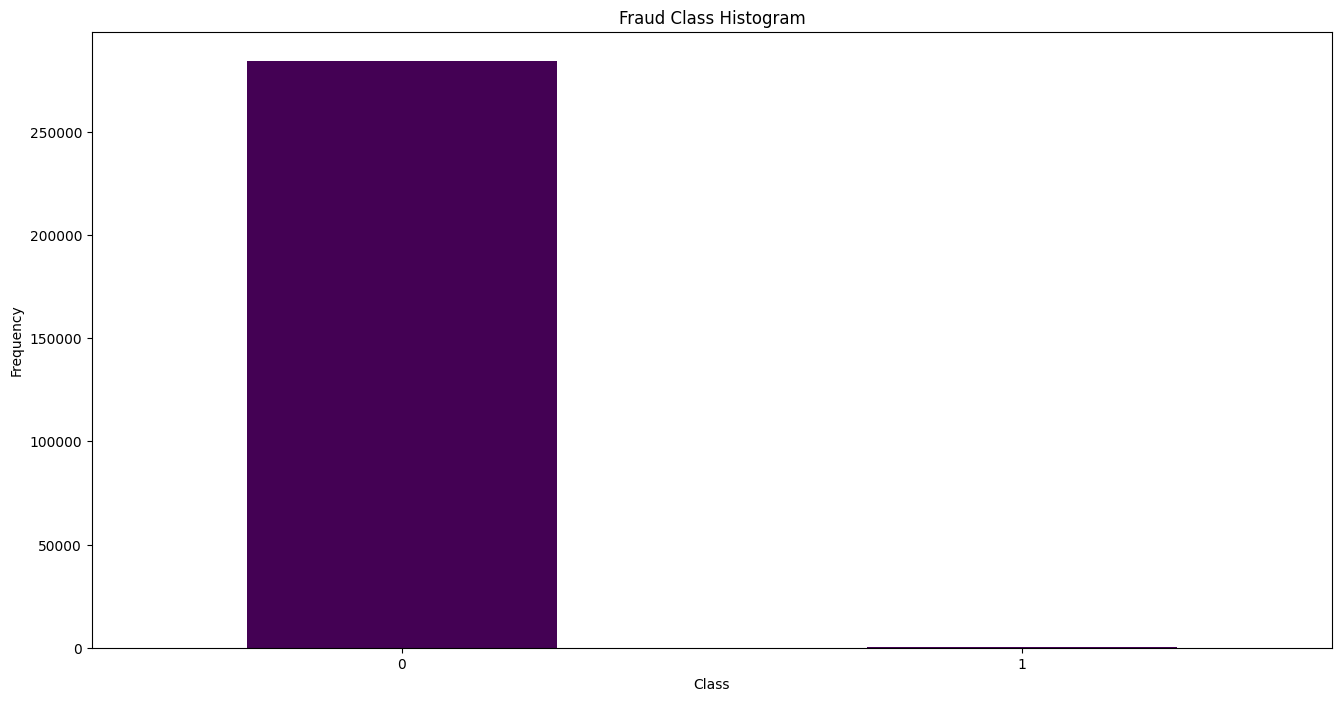

In [ ]:
# Checking for the fraud and valid trasactions in a graph for better understanding

count_classes = pd.value_counts(df['Class'], sort = True ).sort_index()
count_classes.plot(kind = 'bar' ,rot = 0 ,colormap ='viridis')

plt.title ( "Fraud Class Histogram" )
plt.xlabel( "Class" )
plt.ylabel( "Frequency" )

### EDA

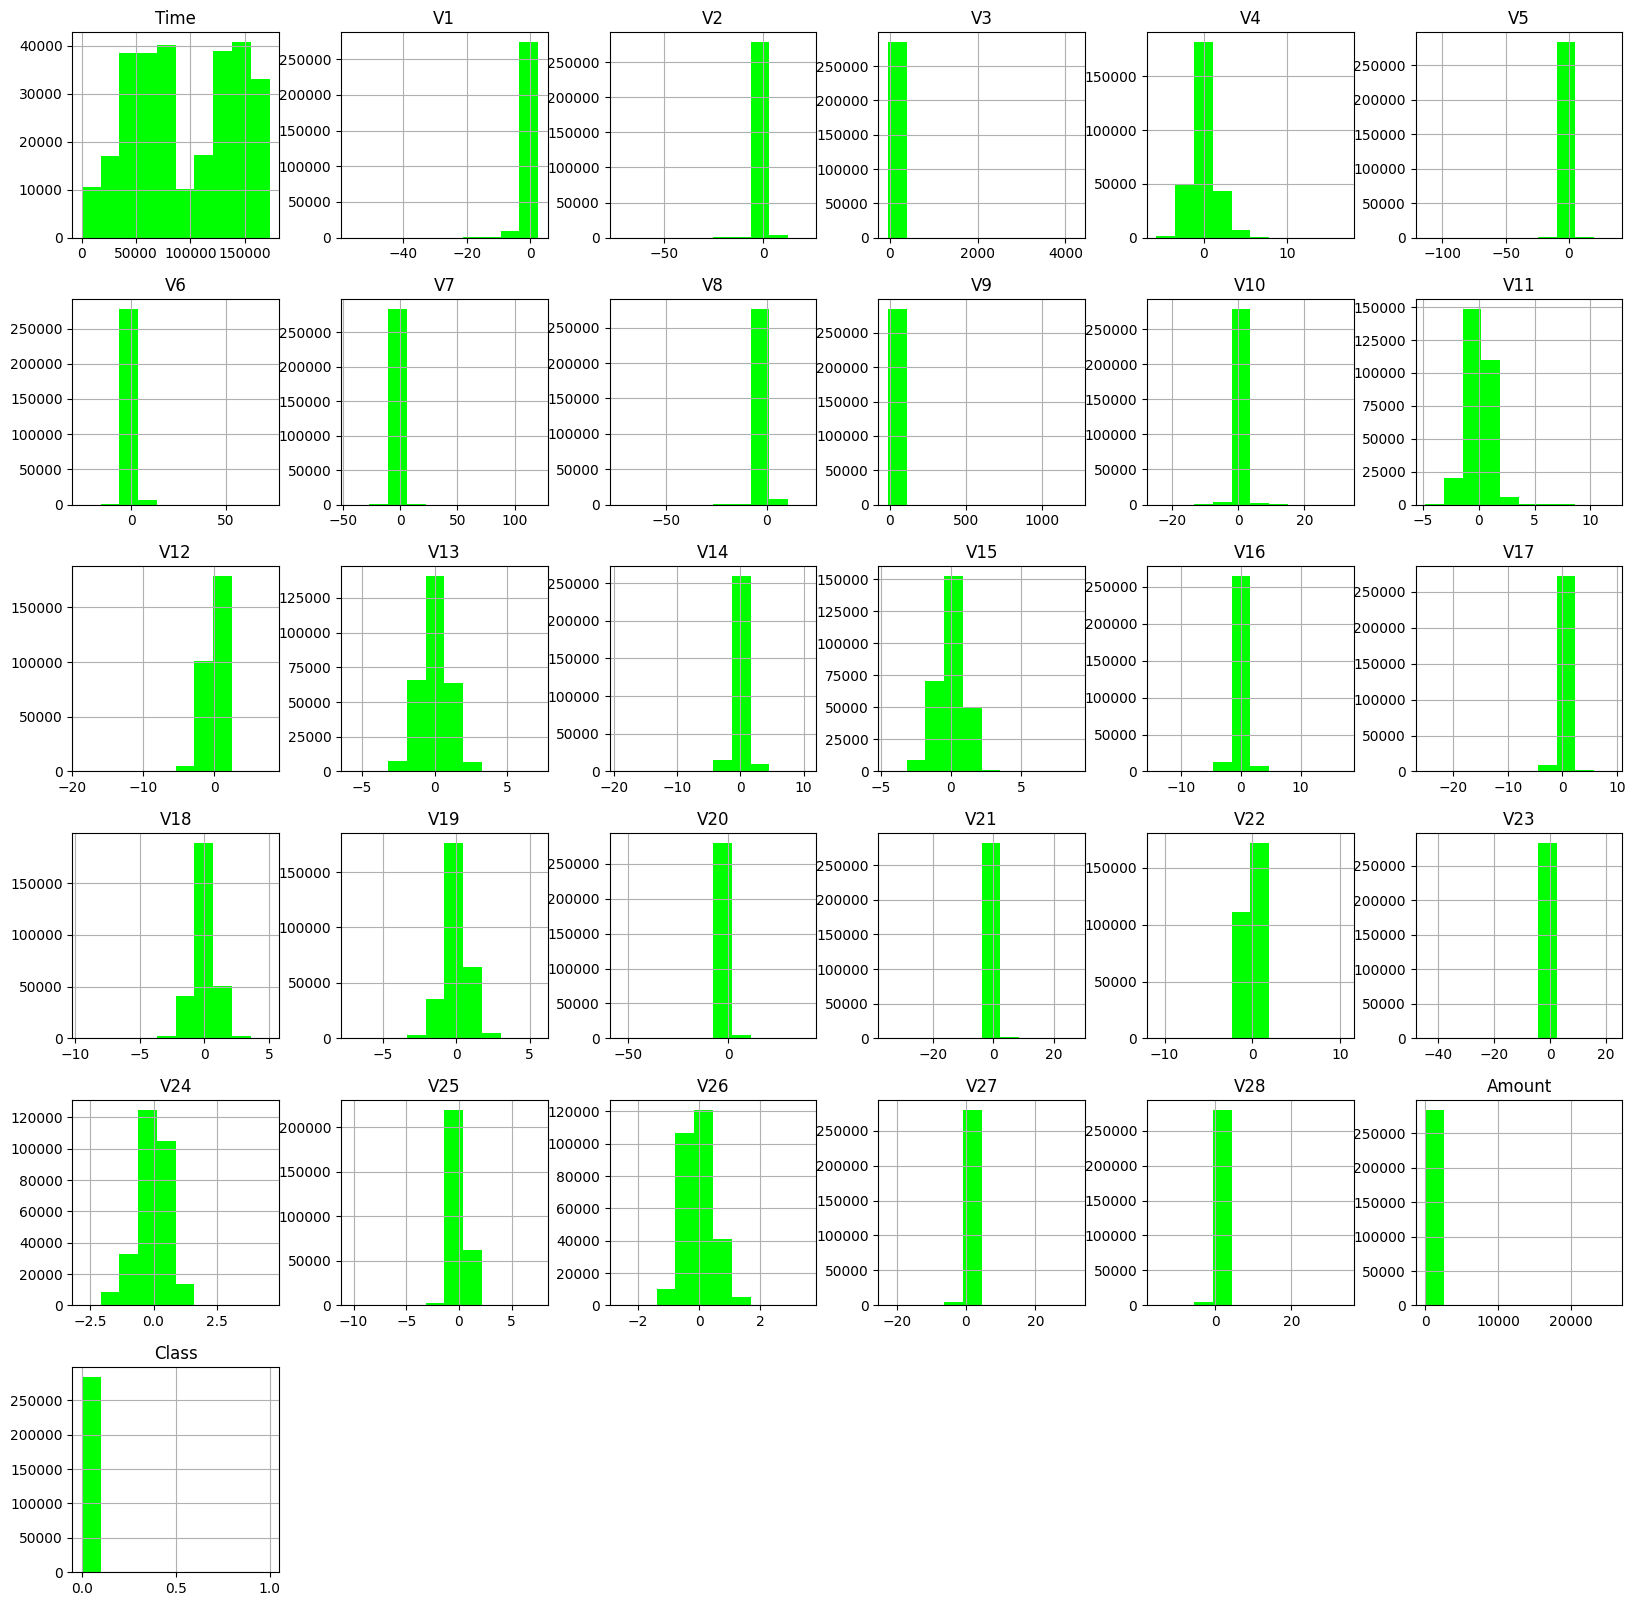

In [ ]:
df.hist(figsize=(20,20),color='lime')
plt.show()

In [ ]:
# Assuming 'Time' and 'Amount' are stored as strings, convert them to numeric types
fraud['Time'] = pd.to_numeric(fraud['Time'])
fraud['Amount'] = pd.to_numeric(fraud['Amount'])

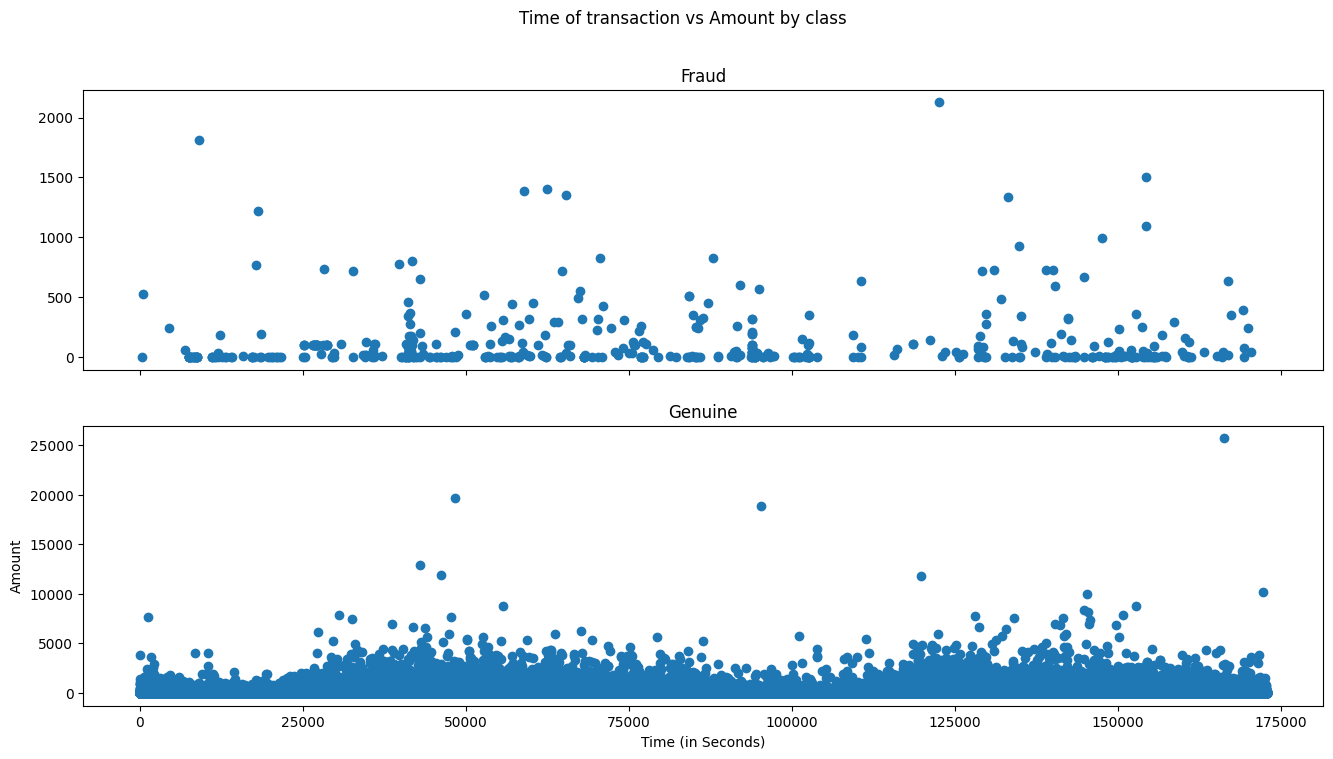

In [ ]:
    rcParams['figure.figsize'] = 16, 8
    f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
    f.suptitle('Time of transaction vs Amount by class')
    ax1.scatter(fraud.Time, fraud.Amount)
    ax1.set_title('Fraud')
    ax2.scatter(genuine.Time, genuine.Amount)
    ax2.set_title('Genuine')
    plt.xlabel('Time (in Seconds)')
    plt.ylabel('Amount')
    plt.show()

Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [ ]:
# make a new sample
genuine_sample = genuine.sample(n=492)

### Concatenating two DataFrames

In [ ]:
#Concatenating two DataFrames
new_dataset = pd.concat([genuine_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
139443,83158.0,0.991772,-1.797742,0.771318,-1.063504,-2.112502,-0.553722,-1.012181,-0.105599,-1.694698,...,0.138228,0.354088,-0.102040,0.628382,0.123118,-0.131265,0.028755,0.068248,233.00,0
63240,50624.0,1.168923,-0.147881,0.662660,0.000988,-0.777953,-0.656920,-0.281518,0.004061,0.089762,...,-0.179587,-0.654538,0.141670,0.349311,-0.048479,0.724521,-0.078124,0.008098,33.90,0
3766,3263.0,-0.104979,0.326376,0.208022,-1.892027,0.237738,-1.023539,0.680444,-0.209418,-1.704676,...,0.380917,1.103479,-0.058097,0.060992,-0.585920,-0.424593,0.424716,0.268164,25.00,0
257131,158016.0,2.051880,0.034887,-1.824890,0.240945,0.538143,-0.408025,0.016347,-0.020135,0.388981,...,-0.342455,-0.959505,0.301244,0.161488,-0.278840,0.175497,-0.072747,-0.045499,1.98,0
155833,106520.0,-1.410066,-0.050926,1.454028,-3.062444,-0.736523,0.144170,-0.329837,0.087739,-0.365494,...,-0.386171,-0.246660,-0.371190,0.590928,0.562536,-0.280031,-0.361375,-0.324473,46.00,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset.shape

(984, 31)

In [ ]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95177.140244,0.175075,0.004796,-0.079060,-0.064362,-0.054610,0.013604,0.014666,0.053522,0.011463,...,0.015970,-0.022180,-0.006471,-0.019546,0.035817,0.029503,0.018861,0.009218,-0.002846,89.375325
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Splitting the data into Features & Targets


In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
139443,83158.0,0.991772,-1.797742,0.771318,-1.063504,-2.112502,-0.553722,-1.012181,-0.105599,-1.694698,...,0.095138,0.138228,0.354088,-0.102040,0.628382,0.123118,-0.131265,0.028755,0.068248,233.00
63240,50624.0,1.168923,-0.147881,0.662660,0.000988,-0.777953,-0.656920,-0.281518,0.004061,0.089762,...,-0.007815,-0.179587,-0.654538,0.141670,0.349311,-0.048479,0.724521,-0.078124,0.008098,33.90
3766,3263.0,-0.104979,0.326376,0.208022,-1.892027,0.237738,-1.023539,0.680444,-0.209418,-1.704676,...,0.226259,0.380917,1.103479,-0.058097,0.060992,-0.585920,-0.424593,0.424716,0.268164,25.00
257131,158016.0,2.051880,0.034887,-1.824890,0.240945,0.538143,-0.408025,0.016347,-0.020135,0.388981,...,-0.191720,-0.342455,-0.959505,0.301244,0.161488,-0.278840,0.175497,-0.072747,-0.045499,1.98
155833,106520.0,-1.410066,-0.050926,1.454028,-3.062444,-0.736523,0.144170,-0.329837,0.087739,-0.365494,...,-0.221413,-0.386171,-0.246660,-0.371190,0.590928,0.562536,-0.280031,-0.361375,-0.324473,46.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [ ]:
Y

139443    0
63240     0
3766      0
257131    0
155833    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)


(984, 30) (787, 30) (197, 30)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

##  Model building



In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [ ]:
# Evaluate models and select the best based on F1-score
best_model = None
best_f1_score = 0

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    class_report = classification_report(Y_test, y_pred, output_dict=True)
    f1_score = class_report['1']['f1-score']

    print(f"Model: {model_name}")
    print("Classification Report:\n", classification_report(Y_test, y_pred))
    print("F1-Score:", f1_score)
    print("="*50)

    if f1_score > best_f1_score:
        best_f1_score = f1_score
        best_model = model_name

print("Best Model:", best_model)

Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.98      0.88      0.92        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

F1-Score: 0.9247311827956989
Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        99
           1       1.00      0.88      0.93        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197

F1-Score: 0.9347826086956522
Model: Support Vector Machine
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.98      

In [81]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[97  2]
 [12 86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.98      0.88      0.92        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [82]:
# Saving with protocol version
with open('credit_card_fraud_detection_trained_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file, protocol=pickle.HIGHEST_PROTOCOL)

In [83]:
# Create a synthetic new dataset
num_samples = 1000

# Generate random features
np.random.seed(42)
features = np.random.randn(num_samples, 30)

# Create a target variable (0 for normal transactions, 1 for fraud)
target = np.random.choice([0, 1], num_samples, p=[0.98, 0.02])

# Create a DataFrame
new_data = pd.DataFrame(features, columns=[f'feature_{i}' for i in range(1, 31)])
new_data['Class'] = target

# Save the new dataset to a CSV file
new_data.to_csv('new_credit_card_transactions.csv', index=False)

In [84]:
# Load and preprocess new data
new_data = pd.read_csv('new_credit_card_transactions.csv')  # Replace with the filename of your new data
# Separate features (X) from the new data
X_new_data = new_data.drop('Class', axis=1)
scaler = StandardScaler()
new_data_preprocessed = scaler.fit_transform(new_data)

In [85]:
# Loading with the same protocol version
with open('credit_card_fraud_detection_trained_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [86]:
X_new_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,...,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
1,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,...,0.324084,-0.385082,-0.676922,0.611676,1.031000,0.931280,-0.839218,-0.309212,0.331263,0.975545
2,-0.479174,-0.185659,-1.106335,-1.196207,0.812526,1.356240,-0.072010,1.003533,0.361636,-0.645120,...,-0.219672,0.357113,1.477894,-0.518270,-0.808494,-0.501757,0.915402,0.328751,-0.529760,0.513267
3,0.097078,0.968645,-0.702053,-0.327662,-0.392108,-1.463515,0.296120,0.261055,0.005113,-0.234587,...,-1.918771,-0.026514,0.060230,2.463242,-0.192361,0.301547,-0.034712,-1.168678,1.142823,0.751933
4,0.791032,-0.909387,1.402794,-1.401851,0.586857,2.190456,-0.990536,-0.566298,0.099651,-0.503476,...,0.227460,1.307143,-1.607483,0.184634,0.259883,0.781823,-1.236951,-1.320457,0.521942,0.296985


In [87]:
# Make predictions using the loaded model
predictions = loaded_model.predict(X_new_data)


In [88]:
# Print the predictions
print("Predictions:", predictions)

Predictions: [1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0
 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0
 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1

In [89]:
len(predictions)

1000

In [90]:
# Count the number of predicted fraud transactions
num_fraud_predictions = sum(predictions)
num_valid_predictions = 1000-num_fraud_predictions

# Print the predictions and the number of fraud transactions
print("Number of predicted fraud transactions:", num_fraud_predictions)
print("Number of predicted valid transactions:", num_valid_predictions)

Number of predicted fraud transactions: 781
Number of predicted valid transactions: 219


### All of our models performed with a high accuracy.